In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import OneHotEncoder


In [28]:
data = pd.read_excel("/home/fabio/Dropbox/Python Projects/SFDR_Prediction.xlsx")
#data.head()

In [29]:
#Drop unecessary columns
#data.info()
data = data.drop(["FUND_SHARE_CLASS_ID","FUND_NAME","Client_ID", "Security_Status","FUND_ISIN",
                 "FUND_ID", "FaireFondRating","FUND_LATEST_HOLDINGS_DATE","FUND_MANAGER",
                 "FUND_INVESTMENT_STRATEGY","FUND_ASSET_CLASS",
                 "FUND_ASSET_UNIVERSE","Hedged Portfolio Exposure","MoSt_BM"]
                 , axis = 1 )


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1694 entries, 0 to 1693
Data columns (total 68 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   MoSt_SFDR                                1694 non-null   object 
 1   MoSt_Rating                              1648 non-null   object 
 2   FUND_WEIGHTED_AVG_CARBON_INTEN           1694 non-null   float64
 3   FUND_WEIGHTED_AVG_CARBON_INTEN_COVERAGE  1694 non-null   float64
 4   FUND_IMPLIED_TEMP_RISE                   1687 non-null   float64
 5   FUND_IMPLIED_TEMP_RISE_COVERAGE          1687 non-null   float64
 6   FUND_SUSTAINABLE_IMPACT_PCT              1694 non-null   float64
 7   FUND_ESG_TREND_NEGATIVE_PCT              1694 non-null   float64
 8   FUND_DOMICILE                            1694 non-null   object 
 9   FUND_ESG_COVERAGE                        1694 non-null   float64
 10  FUND_ESG_COVERAGE_OVERALL                1694 no

In [31]:
pd.options.display.max_rows = 4000
print(data.isnull().sum())
data = data.dropna()
print(data.isnull().sum())

MoSt_SFDR                                    0
MoSt_Rating                                 46
FUND_WEIGHTED_AVG_CARBON_INTEN               0
FUND_WEIGHTED_AVG_CARBON_INTEN_COVERAGE      0
FUND_IMPLIED_TEMP_RISE                       7
FUND_IMPLIED_TEMP_RISE_COVERAGE              7
FUND_SUSTAINABLE_IMPACT_PCT                  0
FUND_ESG_TREND_NEGATIVE_PCT                  0
FUND_DOMICILE                                0
FUND_ESG_COVERAGE                            0
FUND_ESG_COVERAGE_OVERALL                    0
FUND_ESG_LAGGARDS_PCT                        0
FUND_ESG_POLICY                              0
FUND_ESG_QUALITY_SCORE                       0
FUND_ESG_QUALITY_SCORE_PCTL_GLOBAL          43
FUND_ESG_QUALITY_SCORE_PCTL_PEER            81
FUND_ESG_RATING                              0
FUND_ESG_TREND_POSITIVE_PCT                  0
FUND_HOLDINGS_COUNT                          0
FUND_LIPPER_GLOBAL_CLASS_SIZE               43
FUND_WEIGHTED_AVG_ESG_SCORE                  0
FUND_SRI_EXCL

<AxesSubplot:xlabel='MoSt_SFDR', ylabel='count'>

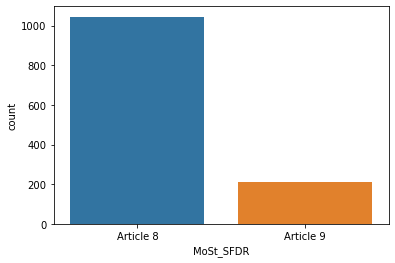

In [33]:
import seaborn as sns
type(data["MoSt_SFDR"])
sns.countplot(x="MoSt_SFDR", data=data)

In [34]:
#import modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

#get X and y 
y = data["MoSt_SFDR"].apply(lambda x: pd.NA if pd.isna(x) else 1 if x == "Article 9" else 0)
data = data.drop("MoSt_SFDR", axis = 1)
X = data[list(data.columns)]
print(X.head())
print("Shape of X: " ,X.shape)
print("Shape of y : ", y.shape)

     MoSt_Rating  FUND_WEIGHTED_AVG_CARBON_INTEN  \
0  Below Average                       41.554122   
1  Below Average                      101.749294   
2  Below Average                       69.124811   
3  Below Average                      116.954907   
4        Average                      145.239949   

   FUND_WEIGHTED_AVG_CARBON_INTEN_COVERAGE  FUND_IMPLIED_TEMP_RISE  \
0                                96.982970                1.967170   
1                                78.063106                2.236985   
2                                91.899414                2.263059   
3                                96.922000                2.050688   
4                                94.139100                3.746156   

   FUND_IMPLIED_TEMP_RISE_COVERAGE  FUND_SUSTAINABLE_IMPACT_PCT  \
0                        96.982970                     5.706491   
1                        75.445061                    21.898981   
2                        89.928152                    23.057713  

In [35]:
#Split in Train test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
#X_train.head()

In [36]:
#OneHotEncode Data 
from sklearn.preprocessing import OneHotEncoder
categorical_features = ["MoSt_Rating","FUND_DOMICILE","FUND_ESG_POLICY",
                       "FUND_ESG_RATING"]
numerical_features = []
for col in X_train.drop(categorical_features, axis=1).columns:
    numerical_features.append(col)


In [37]:
# create an instance of the OneHotEncoder
onehot = OneHotEncoder(sparse=False)
onehot.fit(X_train[categorical_features])
X_train_onehot = pd.DataFrame(onehot.transform(X_train[categorical_features]).tolist(), columns=onehot.get_feature_names())
X_train_onehot


# create an instance of the StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train_scaled = pd.DataFrame(scaler.transform(X_train[numerical_features]), columns=numerical_features)


X_train_prepped = pd.concat([X_train_onehot, X_train_scaled], axis=1)
X_train_prepped

/home/fabio/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_Above Average,x0_Average,x0_Below Average,x0_High,x0_Low,x1_Austria,x1_Belgium,x1_Denmark,x1_Finland,x1_France,...,Water,Actual Annual Charge,Maximum Annual Charge,Minimum Annual Charge,Actual Initial Charge,Maximum Initial Charge,Actual Redemption Charge,Maximum Redemption Charge,Minimum Redemption Charge,Total Expense Ratio
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.063246,-1.230356,0.600353,-0.062630,-0.439911,1.046069,-0.188758,-0.402186,0.0,-0.393641
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.063246,1.318584,-1.121678,-0.062630,-0.439911,0.116127,-0.188758,-0.402186,0.0,0.849088
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.063246,1.764649,1.576170,-0.062630,-0.439911,0.116127,-0.188758,-0.402186,0.0,1.216258
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.063246,-1.230356,-1.121678,-0.062630,-0.439911,1.046069,-0.188758,-0.402186,0.0,-0.167691
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.063246,-1.230356,-0.949475,-0.062630,-0.439911,0.116127,-0.188758,-0.402186,0.0,-0.774934
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.063246,0.681349,-1.121678,-0.062630,-0.439911,1.046069,-0.188758,-0.402186,0.0,-0.040593
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.063246,-1.230356,-1.121678,-0.062630,-0.439911,-1.278786,-0.188758,2.332900,0.0,-2.017663
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.811388,-1.230356,-1.121678,-0.062630,-0.439911,1.162312,-0.188758,-0.060300,0.0,0.284211
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.063246,-1.230356,-0.949475,-0.062630,-0.439911,-1.278786,3.871684,2.332900,0.0,-2.045907
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.063246,-1.230356,-0.834673,-0.062630,-0.439911,0.581098,-0.188758,-0.402186,0.0,0.538406


In [48]:
#Fit the model
# define class weights
w = {0:1, 1:5}
model = LogisticRegression(class_weight=w, random_state=123)
model.fit(X=X_train_prepped, y=y_train)

/home/fabio/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 1, 1: 5}, random_state=123)

In [49]:
# Report accuracy
X_test_onehot = pd.DataFrame(onehot.transform(X_test[categorical_features]).tolist(), columns=onehot.get_feature_names())
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numerical_features]), columns=numerical_features)
X_test_prepped = pd.concat([X_test_onehot, X_test_scaled], axis=1)


/home/fabio/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [50]:
#Predict
y_test_pred = model.predict(X=X_test_prepped)


In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score

print("%-30s: %5.2f" % ("Accuracy: ", accuracy_score(y_true=y_test, y_pred=y_test_pred)))
print("%-30s: %5.2f" % ("Balanced Accuracy: ", balanced_accuracy_score(y_true=y_test, y_pred=y_test_pred)))
print(f'Area Under Curve: {roc_auc_score(y_test, y_test_pred)}')
print("Confusion Matrix: ", confusion_matrix(y_true=y_test, y_pred=y_test_pred))
# print model coefficients
print("Model coefficients:")
print("%-30s: %5.2f" % ("Intercept: ", model.intercept_))
for i,coef in enumerate(model.coef_[0,:]):
    print("%-30s: %5.2f" % (X_test_prepped.columns[i], coef))

Accuracy:                     :  0.81
Balanced Accuracy:            :  0.82
Area Under Curve: 0.8249335336955265
Confusion Matrix:  [[168  43]
 [  6  35]]
Model coefficients:
Intercept:                    : -3.10
x0_Above Average              :  0.42
x0_Average                    :  0.54
x0_Below Average              : -1.61
x0_High                       :  0.02
x0_Low                        :  0.52
x1_Austria                    : -1.97
x1_Belgium                    :  2.55
x1_Denmark                    : -0.51
x1_Finland                    :  0.12
x1_France                     :  1.11
x1_Germany                    : -0.70
x1_Ireland                    :  0.84
x1_Liechtenstein              :  0.30
x1_Luxembourg                 :  0.61
x1_Netherlands                : -0.55
x1_Norway                     : -0.58
x1_Sweden                     : -0.49
x1_UK                         : -0.85
x2_0                          : -0.82
x2_1                          :  0.70
x3_A                       

/home/fabio/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


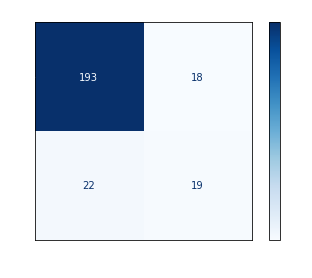

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
color = 'white'
matrix = plot_confusion_matrix(model, X_test_prepped, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [16]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       211
           1       0.51      0.46      0.49        41

    accuracy                           0.84       252
   macro avg       0.71      0.69      0.70       252
weighted avg       0.84      0.84      0.84       252



In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
# Set up Classifier
#classifier_1 = RandomForestClassifier(random_state=1, 
 #                                     criterion="entropy", 
  #                                    bootstrap=False,
   #                                   verbose=0,
    #                                  n_jobs=-1)

# Set up parameter grid 
#param_grid_1 = [{"n_estimators":[500],                   # number of trees in the forest
 #                "max_features": ["sqrt"],               # number of features to consider for the best split
  #               "min_samples_leaf":[0.01, 0.05, 0.1]}]  # minimum percentage of samples required to be at a leaf node     
        
# Set up gridsearch
#rf_1 = GridSearchCV(classifier_1, 
 #                   param_grid=param_grid_1, 
  #                  cv=tscv, 
   #                 verbose=0, 
        
                    #n_jobs=-1, 
    #                scoring="accuracy", 
     #               refit=True, 
      #              return_train_score=False,
       #             iid=False)
             
# Fit the Classifier
clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=6, max_features=3)
clf.fit(X_train_prepped, y_train)
        
clf.score(X_train_prepped,y_train)
pred = clf.predict(X_test_prepped)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       211
           1       0.67      0.05      0.09        41

    accuracy                           0.84       252
   macro avg       0.76      0.52      0.50       252
weighted avg       0.81      0.84      0.78       252



In [54]:
#Weights GridSearch
# define weight hyperparameter
# define hyperparameters
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
crange = np.arange(0.5, 20.0, 0.5)
hyperparam_grid = {"class_weight": w
                   ,"penalty": ["l1", "l2"]
                   ,"C": crange
                   ,"fit_intercept": [True, False]  }

In [55]:
# logistic model classifier
lg4 = LogisticRegression(random_state=13)
# define evaluation procedure
grid = GridSearchCV(lg4,hyperparam_grid,scoring="roc_auc", cv=100, n_jobs=-1, refit=True)
grid.fit(X,y)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

ValueError: 
All the 546000 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
273000 fits failed with the following error:
Traceback (most recent call last):
  File "/home/fabio/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/fabio/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/fabio/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

--------------------------------------------------------------------------------
273000 fits failed with the following error:
Traceback (most recent call last):
  File "/home/fabio/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/fabio/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1138, in fit
    X, y = self._validate_data(
  File "/home/fabio/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/fabio/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 1074, in check_X_y
    X = check_array(
  File "/home/fabio/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "/home/fabio/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py", line 102, in asarray
    return array(a, dtype, copy=False, order=order)
  File "/home/fabio/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py", line 1899, in __array__
    return np.asarray(self._values, dtype=dtype)
  File "/home/fabio/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py", line 102, in asarray
    return array(a, dtype, copy=False, order=order)
ValueError: could not convert string to float: 'Below Average'


In [ ]:
# define model
lg4 = LogisticRegression(random_state=13,C=13.0,fit_intercept=True, penalty='l2',class_weight={0: 1, 1: 100} )
# fit it
lg4.fit(X_train_prepped,y_train)
# test
y_pred = lg4.predict(X_test_prepped)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}') # 0.5
print(f'Recall score: {recall_score(y_test,y_pred)}')